<a href="https://colab.research.google.com/github/quiquegtz27/python-ml-course/blob/Collab---v-3.8/notebooks/T2%20-%202%20-%20Data%20Cleaning%20-%20Funciones%20de%20distribuci%C3%B3n%20de%20probabilidad%20-%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de distribución de probabilidades
## Distribución Uniforme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
a = 1
b = 100
n = 1000000
#Generación de números aleatorios que cumplan con una distribución uniforme
data = np.random.uniform(a, b, n) # (Limite inferior, Limite superior, Número de muestras)

(array([ 99994., 100157., 100342.,  99898.,  99798.,  99396.,  99929.,
        100606.,  99705., 100175.]),
 array([ 1.00012488, 10.90010377, 20.80008266, 30.70006154, 40.60004043,
        50.50001931, 60.3999982 , 70.29997709, 80.19995597, 90.09993486,
        99.99991374]),
 <a list of 10 Patch objects>)

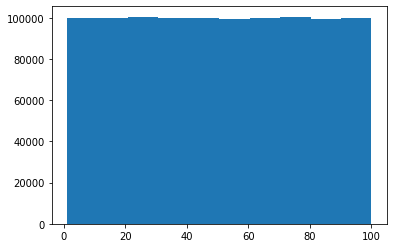

In [ ]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [ ]:
#Generación de un set de números aleatorios que cumplen con una distriución normal
data = np.random.randn(100000)

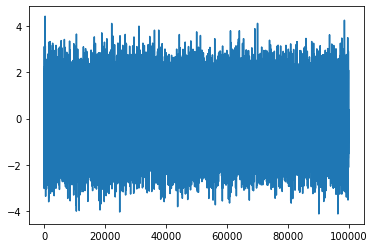

In [ ]:
#Imprimir en sucesión todos los valores contra un eje x creado para ver que todos son diferentes
x = range(1,100001)
plt.plot(x, data)

(array([9.0000e+00, 4.0000e+01, 1.9000e+02, 5.5400e+02, 1.5540e+03,
        3.5670e+03, 6.8890e+03, 1.1214e+04, 1.5104e+04, 1.7028e+04,
        1.5791e+04, 1.2400e+04, 8.0270e+03, 4.5270e+03, 2.0070e+03,
        7.7500e+02, 2.4400e+02, 6.2000e+01, 1.4000e+01, 4.0000e+00]),
 array([-4.12588577, -3.69813102, -3.27037626, -2.84262151, -2.41486676,
        -1.987112  , -1.55935725, -1.13160249, -0.70384774, -0.27609299,
         0.15166177,  0.57941652,  1.00717127,  1.43492603,  1.86268078,
         2.29043554,  2.71819029,  3.14594504,  3.5736998 ,  4.00145455,
         4.42920931]),
 <a list of 20 Patch objects>)

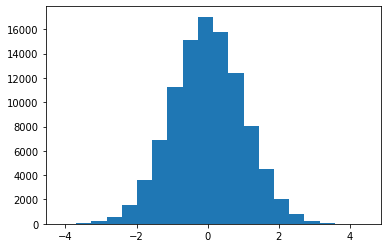

In [ ]:
%matplotlib inline
#Histograma de los valores, en donde se puede ver que se dibuja la camapana de Gauss
plt.hist(data, 20)

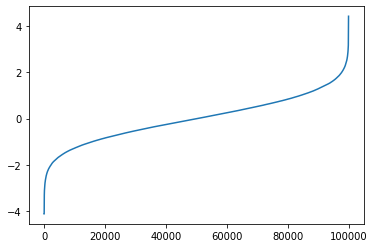

In [ ]:
#Dibujando la función de distribución acumulada.
plt.plot(x,sorted(data))

####Tipificando para encontrar una normalizar una distribución con Propia media y propia desviación estándar, siguiendo el teorema central del límite:
$$Z = \frac{(X-\mu)}{σ} → N(0,1) $$
####Despejando para X
$$X = μ + σZ$$

(array([  10.,  131.,  678., 1912., 3014., 2652., 1209.,  319.,   67.,
           8.]),
 array([-3.89166878, -1.92981538,  0.03203802,  1.99389142,  3.95574482,
         5.91759821,  7.87945161,  9.84130501, 11.80315841, 13.76501181,
        15.72686521]),
 <a list of 10 Patch objects>)

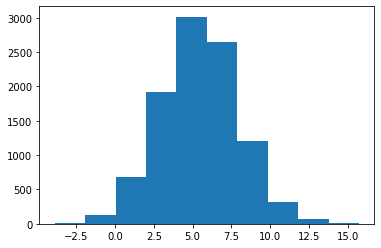

In [ ]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [ ]:
#Para conseguir más de una muestra con randn
data = np.random.randn(2,4)
data

array([[-1.4700105 , -0.54639732,  0.79673429,  1.46151614],
       [-1.08773032,  0.51165757,  0.22659485, -1.28015141]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1405639999999995


(3.1405639999999995, [<matplotlib.lines.Line2D at 0x7f075a355150>])

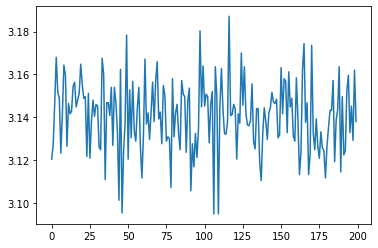

In [12]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [18]:
n = 1000000
#Se define como un diccionario con el método de pandas DataFrame
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)
data

,A,B,C
0,-0.932357,2.535991,25.926747
1,0.088277,0.389070,23.627533
2,0.481407,1.040994,24.206493
3,-0.437147,-3.633500,25.787246
4,-0.302757,2.384574,11.537151
...,...,...,...
999995,-0.975542,1.660766,16.403454
999996,1.847740,1.540364,27.228001
999997,1.322498,2.002387,22.884646
999998,-0.579189,4.059441,31.633413


In [19]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000501,1.500237,18.488814
std,0.999728,2.502492,7.788800
min,-5.127942,-10.750639,5.000039
25%,-0.675543,-0.187918,11.747844
50%,0.000354,1.500537,18.478988
75%,0.674520,3.188130,25.234073
max,4.720023,12.991112,31.999965


(array([2.30000e+01, 7.45000e+02, 1.39720e+04, 1.02731e+05, 3.01967e+05,
        3.63031e+05, 1.78842e+05, 3.57500e+04, 2.84300e+03, 9.60000e+01]),
 array([-5.12794235, -4.14314581, -3.15834928, -2.17355275, -1.18875621,
        -0.20395968,  0.78083685,  1.76563339,  2.75042992,  3.73522646,
         4.72002299]),
 <a list of 10 Patch objects>)

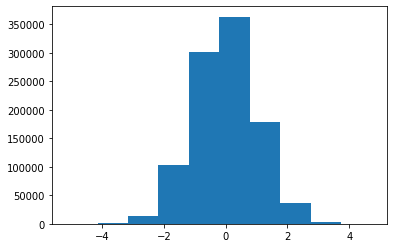

In [20]:
plt.hist(data["A"])

(array([4.40000e+01, 1.34900e+03, 1.88830e+04, 1.15266e+05, 3.04386e+05,
        3.46953e+05, 1.72933e+05, 3.67490e+04, 3.30200e+03, 1.35000e+02]),
 array([-10.75063872,  -8.37646365,  -6.00228858,  -3.62811352,
         -1.25393845,   1.12023662,   3.49441169,   5.86858675,
          8.24276182,  10.61693689,  12.99111196]),
 <a list of 10 Patch objects>)

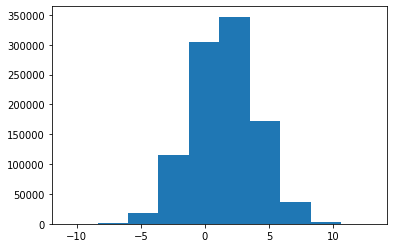

In [21]:
plt.hist(data["B"])

(array([100064.,  99926., 100164.,  99855., 100745., 100066.,  99915.,
        100180.,  99562.,  99523.]),
 array([ 5.00003942,  7.70003202, 10.40002462, 13.10001721, 15.80000981,
        18.50000241, 21.199995  , 23.8999876 , 26.5999802 , 29.2999728 ,
        31.99996539]),
 <a list of 10 Patch objects>)

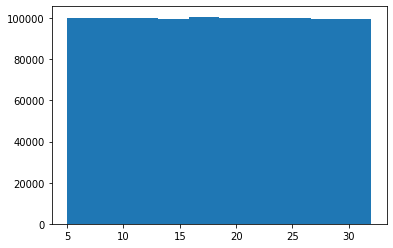

In [22]:
plt.hist(data["C"])

In [23]:
data = pd.read_csv("https://raw.githubusercontent.com/quiquegtz27/python-ml-course/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt")

In [24]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [25]:
colum_names = data.columns.values.tolist()

In [26]:
a = len(colum_names)
a

21

In [29]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a) #Para modificar los índices en donde va a ir generado el DataSet
)

In [28]:
new_data

,Column Name,A,B
42,State,-1.404185,0.625750
43,Account Length,-0.550860,0.426893
44,Area Code,-0.694218,0.305075
45,Phone,0.857715,0.018541
46,Int'l Plan,-0.584499,0.914247
47,VMail Plan,0.560115,0.868735
48,VMail Message,0.066948,0.226306
49,Day Mins,0.155566,0.691979
50,Day Calls,-1.405880,0.368896
51,Day Charge,-0.202657,0.441550
